In [1]:
#libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import timeit
import random

In [3]:
def artbyrandomforest(inputfile):
    img = Image.open(inputfile)
    img = np.asarray(img)
    print 'Original Image'
    plt.imshow(img)
    plt.show()

    row = img.shape[0]
    col = img.shape[1]

    pixelsamples = random.randint(1,int(row*col*0.01))
    trees = random.randint(1,15)
    depth = random.randint(1,15)
    print 'Number of Pixel Samples = ' + str(pixelsamples)
    print 'Number of Trees = ' + str(trees)
    print 'Number of Depth = ' + str(depth)

    #training data
    loc, rgb = [], []
    for i in range(pixelsamples):
        point = []
        point.append(np.random.randint(row))
        point.append(np.random.randint(col))
        loc.append(point)
        rgb.append(img[point[0],point[1]])
    loc = np.array(loc)
    rgb = np.array(rgb)

    #plot training points
    sampleimg = np.zeros([row,col,3], dtype=np.uint8)
    sampleimg.fill(255)
    for i in range(pixelsamples):
        sampleimg[loc[i,0]][loc[i,1]] = rgb[i]
    plt.imshow(sampleimg)
    plt.show()

    #run RF
    rf = RandomForestRegressor(random_state=0, n_estimators=trees, max_depth=depth)
    rf.fit(loc, rgb)
    pred = np.zeros([row,col,3])
    for i in range(row):
        for j in range(col):
            point = [i,j]
            point = np.array(point)
            pred[i,j] = rf.predict(point.reshape(1,-1)) /255
    img = plt.imshow(pred)
    plt.axis('off')
    filename=str(inputfile)+'rf'+'.png'
    plt.savefig(filename, bbox_inches='tight')
    plt.show()
    return pred

Original Image


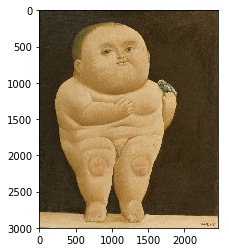

Number of Pixel Samples = 26995
Number of Trees = 1
Number of Depth = 3


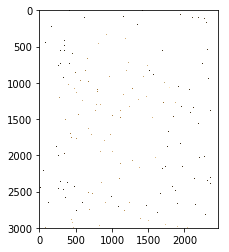

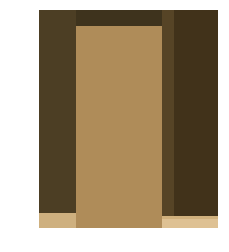

Time Elapsed (min): 39.7838757598


In [5]:
start_time = timeit.default_timer()
pred = artbyrandomforest('ninoconunpajero_botero.jpg')
elapsed = timeit.default_timer() - start_time
print 'Time Elapsed (min): '+str(elapsed/60)
